In [74]:
import pandas as pd 
df=pd.read_csv("C:\\Users\\Neel\\Desktop\\Greyatom Codes\\Datasets\\gapminder(1).csv")
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [75]:
df.shape

(139, 10)

In [76]:
df.isnull().sum()

population         0
fertility          0
HIV                0
CO2                0
BMI_male           0
GDP                0
BMI_female         0
life               0
child_mortality    0
Region             0
dtype: int64

In [77]:
df1=df

In [78]:
df=pd.get_dummies(df) #To handle categorical columns

In [79]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region_America,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,0,0,0,1,0,0
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,0,0,0,0,0,1
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,1,0,0,0,0,0
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,0,0,1,0,0,0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,0,1,0,0,0,0


In [80]:
X=df.drop(["life"],1)
y=df["life"]

### Solving the problem using KNN Regressor

In [81]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor()

In [82]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(x,y, test_size = 0.3, random_state = 0)

In [83]:
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [84]:
from sklearn.metrics import r2_score

In [85]:
y_pred=knn.predict(X_test)

In [86]:
r2_score(y_test,y_pred) #Since the scaling is not performed on the dataset

-0.4702244260774566

### Applying Linear Regression on same problem without Feature Selection

In [87]:
from sklearn.linear_model import LinearRegression

In [88]:
lin_reg=LinearRegression()

In [89]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
y_pred=lin_reg.predict(X_test)

In [91]:
r2_score(y_test,y_pred)

0.8297487276646315

### Linear Regression after performing Feature Selection 

In [92]:
import seaborn as sns
df.corr()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region_America,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa
population,1.000000,-0.061345,-0.065821,-0.010147,-0.134905,-0.045687,-0.135149,-0.005051,0.008058,-0.013131,0.052950,-0.087661,-0.028289,0.394109,-0.109651
fertility,-0.061345,1.000000,0.292695,-0.439747,-0.715380,-0.502615,0.527314,-0.786921,0.901704,-0.166060,-0.147947,-0.527514,-0.080802,-0.047537,0.843908
HIV,-0.065821,0.292695,1.000000,-0.165889,-0.308700,-0.208410,0.396680,-0.604749,0.394913,-0.119511,-0.118288,-0.244338,-0.098718,-0.091429,0.529699
CO2,-0.010147,-0.439747,-0.165889,1.000000,0.581031,0.823099,-0.280813,0.476666,-0.458186,0.011841,-0.004024,0.289134,0.232048,-0.125772,-0.370605
BMI_male,-0.134905,-0.715380,-0.308700,0.581031,1.000000,0.625126,-0.447049,0.731559,-0.749691,0.287028,-0.108400,0.521400,0.168036,-0.297883,-0.655982
GDP,-0.045687,-0.502615,-0.208410,0.823099,0.625126,1.000000,-0.400740,0.628999,-0.543874,-0.059432,0.015921,0.426041,0.155637,-0.136921,-0.410489
BMI_female,-0.135149,0.527314,0.396680,-0.280813,-0.447049,-0.400740,1.000000,-0.658718,0.582053,-0.413930,-0.330121,-0.044888,-0.003439,-0.098710,0.676033
life,-0.005051,-0.786921,-0.604749,0.476666,0.731559,0.628999,-0.658718,1.000000,-0.874106,0.228923,0.073007,0.457661,0.154909,-0.005864,-0.795163
child_mortality,0.008058,0.901704,0.394913,-0.458186,-0.749691,-0.543874,0.582053,-0.874106,1.000000,-0.234225,-0.119082,-0.479644,-0.119089,0.020088,0.825253
Region_America,-0.013131,-0.166060,-0.119511,0.011841,0.287028,-0.059432,-0.413930,0.228923,-0.234225,1.000000,-0.164317,-0.317579,-0.136703,-0.113067,-0.312094


In [93]:
import matplotlib.pyplot as plt

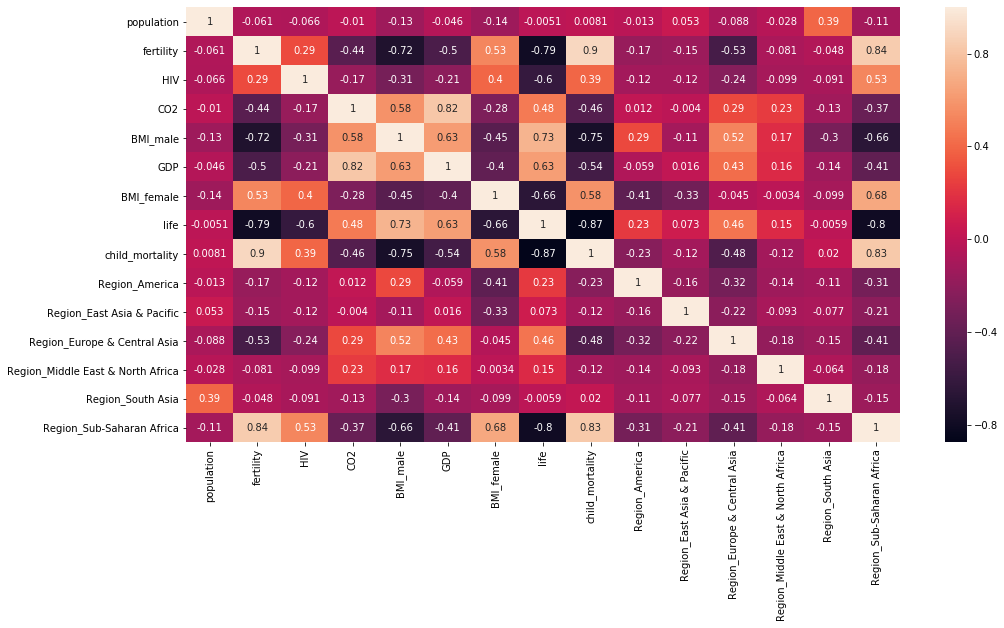

In [94]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [95]:
X=df1[["fertility","GDP"]]
y=df1["child_mortality"]

In [96]:
from sklearn.linear_model import LinearRegression

In [97]:
lin_reg=LinearRegression()

In [98]:
X_train,X_test,y_train,y_test = tts(X,y, test_size = 0.3, random_state = 42)

In [99]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [100]:
y_pred=lin_reg.predict(X_test)

In [101]:
r2_score(y_test,y_pred)

0.8841889393331849

In [102]:
s=pd.read_csv("C:\\Users\\Neel\\Desktop\\Greyatom Codes\\Datasets\\50_Startups.csv")
s.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [103]:
s.shape

(50, 5)

In [104]:
s["State"].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [105]:
s=pd.get_dummies(s)

In [106]:
s=s.drop(["State_New York"],1)

In [107]:
X=s.drop(["Profit"],1)
y=s["Profit"]

In [108]:
X_train,X_test,y_train,y_test = tts(X,y, test_size = 0.3, random_state = 42)

In [109]:
lin_reg=LinearRegression(normalize=True)

In [110]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [111]:
y_pred=lin_reg.predict(X_test)

In [112]:
r2_score(y_test,y_pred)

0.9397108063355787